In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
   "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names

In [5]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
68*32

2176

In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 1 0 1 0 1 0 0 2 0 1 0 0 2 0 1 0 0 0 1 1 1 1 0 1 0 1 0]


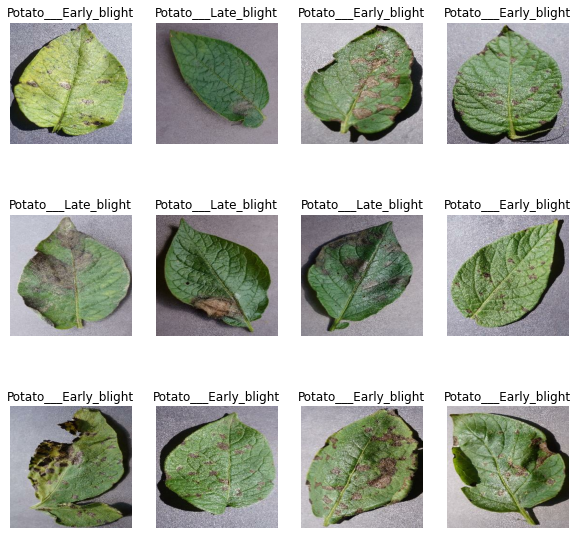

In [9]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [10]:
#lets split the data as 80% into training, 10% into validation and 10% for test
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [11]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [12]:
len(train_ds)

54

In [13]:
len(val_ds)

6

In [14]:
len(test_ds)

8

In [15]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [18]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 119s 2s/step - loss: 0.9181 - accuracy: 0.4728 - val_loss: 0.8352 - val_accuracy: 0.4792
Epoch 2/50
54/54 [==============================] - 107s 2s/step - loss: 0.7965 - accuracy: 0.6354 - val_loss: 0.9909 - val_accuracy: 0.5000
Epoch 3/50
54/54 [==============================] - 1308s 25s/step - loss: 0.5073 - accuracy: 0.7755 - val_loss: 0.3509 - val_accuracy: 0.8542
Epoch 4/50
54/54 [==============================] - 85s 2s/step - loss: 0.3828 - accuracy: 0.8385 - val_loss: 0.3207 - val_accuracy: 0.8854
Epoch 5/50
54/54 [==============================] - 99s 2s/step - loss: 0.3358 - accuracy: 0.8692 - val_loss: 0.2997 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 99s 2s/step - loss: 0.2836 - accuracy: 0.8831 - val_loss: 0.2765 - val_accuracy: 0.8802
Epoch 7/50
54/54 [==============================] - 125s 2s/step - loss: 0.2530 - accuracy: 0.8964 - val_loss: 0.3723 - val_accuracy: 0.8490
Epoch 8/50
54/

In [22]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 10s 424ms/step - loss: 0.0510 - accuracy: 0.9727


In [23]:
scores

[0.050996337085962296, 0.97265625]

In [24]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
acc=history.history["accuracy"]
val=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [27]:
len(history.history["accuracy"])

50

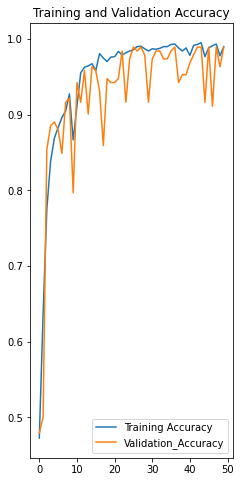

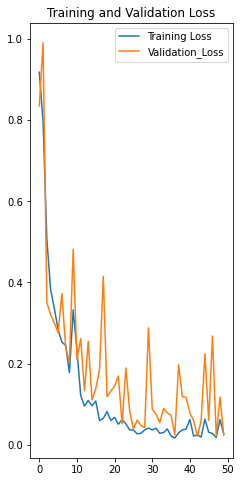

In [28]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val,label='Validation_Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation_Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 548ms/step


<IPython.core.display.Javascript object>

Predicted label: Potato___Early_blight
first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 571ms/step


<IPython.core.display.Javascript object>

Predicted label: Potato___Early_blight
first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 564ms/step


<IPython.core.display.Javascript object>

Predicted label: Potato___Late_blight
first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 547ms/step


<IPython.core.display.Javascript object>

Predicted label: Potato___Early_blight
first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 580ms/step


<IPython.core.display.Javascript object>

Predicted label: Potato___Early_blight
first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 535ms/step


<IPython.core.display.Javascript object>

Predicted label: Potato___Late_blight
first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 580ms/step


<IPython.core.display.Javascript object>

Predicted label: Potato___Late_blight
first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 549ms/step


<IPython.core.display.Javascript object>

Predicted label: Potato___healthy


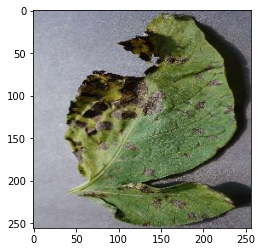

In [55]:
for images_batch,label_batch in test_ds.take(1):
    first_image=image_batch[i].numpy().astype('uint8')
    first_label=label_batch[i].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print('actual label:',class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

In [51]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence


1/1 [==============================] - 0s 63ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 64ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 63ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 63ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 63ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 63ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 58ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 61ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 63ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

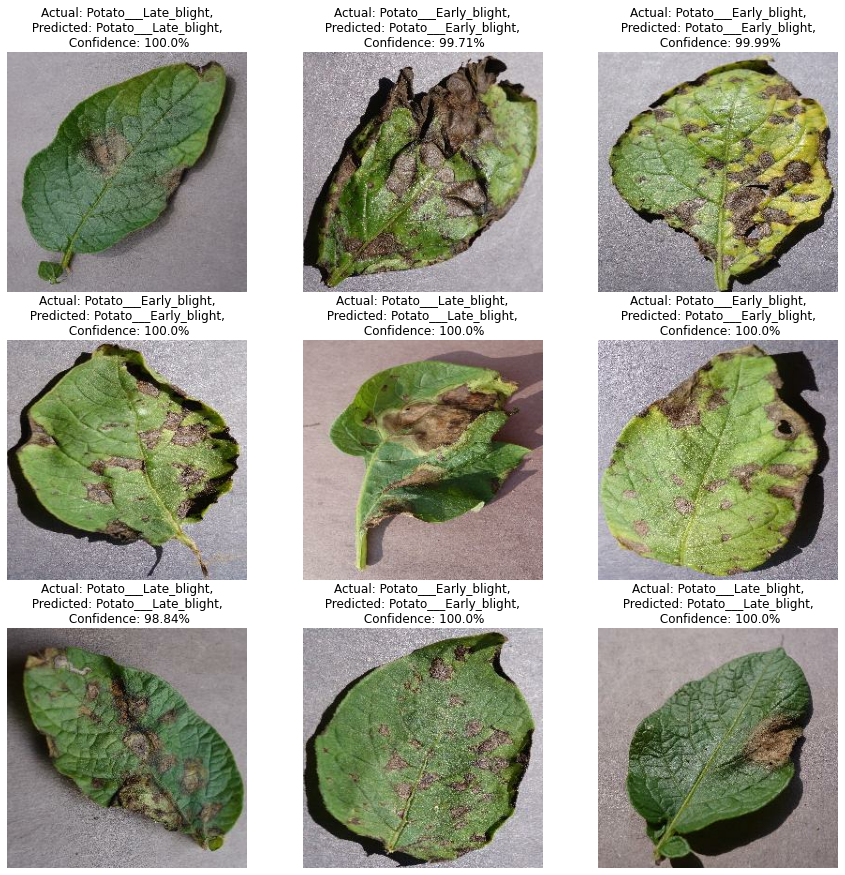

In [49]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        plt.axis('off')

In [38]:
model.save("potato_disease.h5")